In [4]:

import argparse
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from dataGenerator import DataGenerator
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


In [2]:
def evaluate_subject_with_data_from(subject, data_from, environment='Classroom'):
  model_dir = f'../Data/proximity/{environment}/80MHz/3mo/{subject}/{environment}_{subject}_{data_from}.h5'
  model = load_model(model_dir)

  test_dir = f'../Data/proximity/{environment}/80MHz/3mo/{subject}/Slots/Test_{data_from}'
  test_csv = os.path.join(test_dir, 'test_set.csv')
  window_size = 50
  NoOfSubcarrier = 242
  labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']

  test_gen = DataGenerator(test_dir, test_csv, NoOfSubcarrier, len(labels), (window_size, NoOfSubcarrier, 2), batchsize=64, shuffle=False)

  final_loss, final_accuracy = model.evaluate(test_gen)
  return final_loss, final_accuracy

In [ ]:
environments = ['Classroom', 'Office']
subjects = ['m1', 'm2', 'm3']
data_froms = ['m1', 'm2', 'm3']
results = {'environment': [], 'subject': [], 'data_from': [], 'final_loss': [], 'final_accuracy': []}
for environment in environments:
  for subject in subjects:
    for data_from in data_froms:
      final_loss, final_accuracy = evaluate_subject_with_data_from(subject, data_from, environment=environment)
      results['environment'].append(environment)
      results['subject'].append(subject)
      results['data_from'].append(data_from)
      results['final_loss'].append(final_loss)
      results['final_accuracy'].append(final_accuracy)

In [7]:
results_df = pd.DataFrame(results)
results_df.to_csv('SAIDAS/01-results_proximity.csv', index=False)
results_df

,environment,subject,data_from,final_loss,final_accuracy
0,Classroom,m1,m1,0.092465,0.977476
1,Classroom,m1,m2,0.516268,0.895292
2,Classroom,m1,m3,0.207088,0.948563
3,Classroom,m2,m1,0.486325,0.891493
4,Classroom,m2,m2,0.099031,0.972722
5,Classroom,m2,m3,0.048153,0.982150
6,Classroom,m3,m1,0.488496,0.922173
7,Classroom,m3,m2,0.218759,0.937756
8,Classroom,m3,m3,0.119181,0.966598
9,Office,m1,m1,0.098053,0.984147


In [17]:
def plot_accuracy(environment):
  df = results_df.query(f"environment=='{environment}'")

  # Configurações
  subjects = ['m1', 'm2', 'm3']
  monitors = ['m1', 'm2', 'm3']
  hatches = ['//', '\\\\', 'xx']  # Padrões de hachura
  colors = ['cyan', 'blue', 'violet']  # Cores de contorno
  bar_width = 0.2

  x = np.arange(len(subjects))  # posições dos subjects

  fig, ax = plt.subplots(figsize=(8, 4))

  # Plot
  for i, monitor in enumerate(monitors):
      accuracies = df[df['data_from'] == monitor]['final_accuracy'] * 100  # porcentagem
      bars = ax.bar(x + i*bar_width, accuracies, width=bar_width, label=f'Monitor {i+1}',
                    hatch=hatches[i], color='none', edgecolor=colors[i])

      # Adicionar o valor percentual acima de cada barra
      for bar in bars:
          height = bar.get_height()
          ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}%', 
                  ha='center', va='bottom', fontsize=8)

  # Customizações
  ax.set_ylabel('Accuracy (%)')
  ax.set_xticks(x + bar_width)
  ax.set_xticklabels(['Subject 1', 'Subject 2', 'Subject 3'])
  ax.legend()
  ax.set_ylim(50, 120)
  ax.grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.title(environment)
  plt.show()


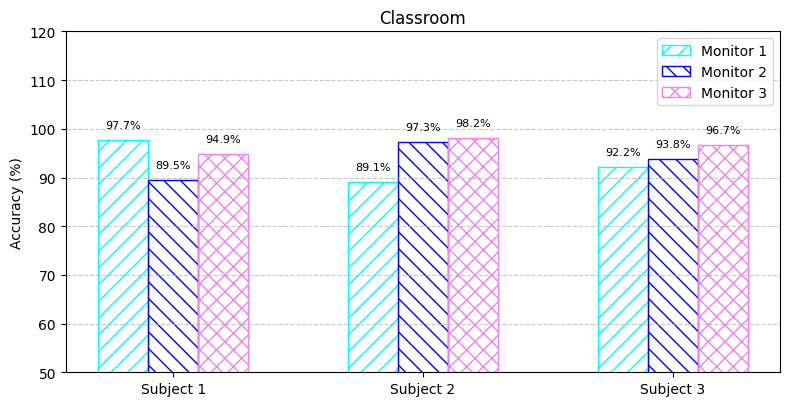

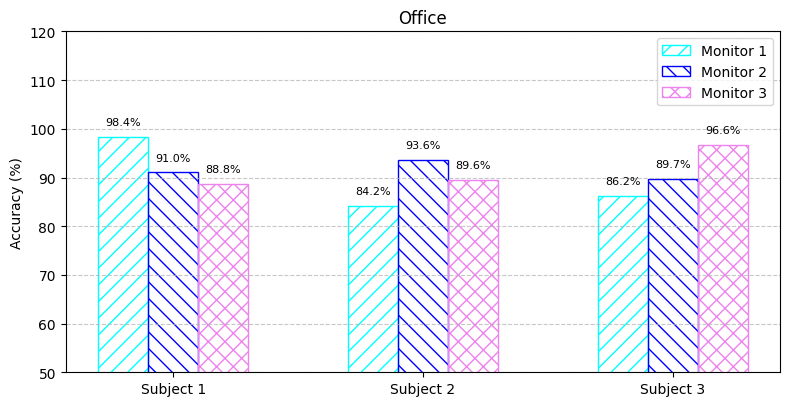

In [18]:
plot_accuracy('Classroom')
plot_accuracy('Office')

O artigo tem outros números

> Figure 3 confirms our intuition. For example, it shows that in the **classroom** environment, the accuracy of Subject 1 is **95% from the CSI data of Monitor 1** whereas, with the exact same setup and tests, the accuracy of **Subject 2 and Subject 3 decreases by 30% on an average with Monitor 1**. This is because they are comparatively farther away from Subject 1 and more prone to the noises created by the other subjects at that instant. However, their performances improve drastically to **96% and 97%** when we consider CSI Monitor 2 and CSI Monitor 3 for
Subject 2 and Subject 3 respectively. The other two environments follow similar trends. This clearly demonstrates that the CSI monitor closest to the subject performs better than other CSI monitors.

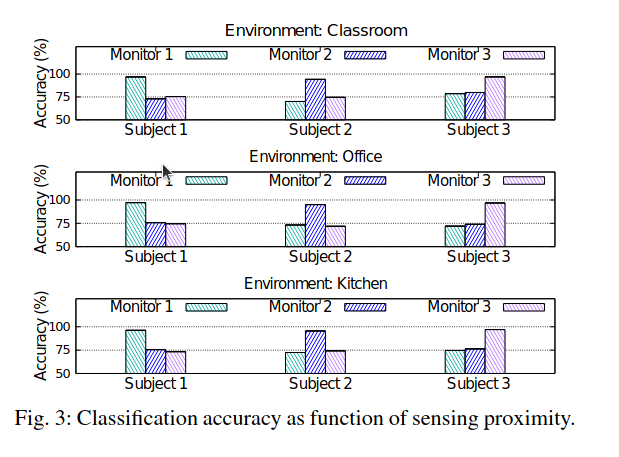